# ML Model - PCA

<div class="alert alert-success">
<b>About Dataset</b>

<u>Context</u>

This is a fictional data set created by IBM data scientists. Uncover the factors that lead to employee attrition and explore related human resource questions we need to analyze employee information.
 Typically job class specs have information which characterize the job class- its features, and a label- in this case a pay grade - something to predict that the features are related to.

<u>Content</u>

The data is a static snapshot. The contents are

<ol>
<li>Age</li>
    <li>Attrition <b>Target variable</b></li>
<li>BusinessTravel</li>
<li>DailyRate</li>
<li>    Department</li>
<li>    DistanceFromHome</li>
<li>    Education</li>
<li>    EducationField</li>
<li>    EmployeeCount</li>
<li>    EmployeeNumber</li>
<li>    EnvironmentSatisfaction</li>
<li>    Gender</li>
<li>    HourlyRate</li>
<li>    JobInvolvement</li>
<li>    JobLevel</li>
<li>    JobRole</li>
<li>    JobSatisfaction</li>
<li>    MaritalStatus</li>
<li>    MonthlyIncome</li>
<li>    MonthlyRate</li>
<li>    NumCompaniesWorked</li>
<li>    Over18</li>
<li>    OverTime</li>
<li>    PercentSalaryHike</li>
<li>    PerformanceRating</li>
<li>    RelationshipSatisfaction</li>
<li>    StandardHours</li>
<li>    StockOptionLevel</li>
<li>    TotalWorkingYears</li>
<li>    TrainingTimesLastYear</li>
<li>    WorkLifeBalance</li>
<li>    YearsAtCompany</li>
<li>    YearsInCurrentRole</li>
<li>    YearsSinceLastPromotion</li>
<li>    YearsWithCurrManager</li>
</ol>

<u>Acknowledgements</u>

This data is purely fictional

 <u>Inspiration</u>

The intent is to use machine learning classification algorithms to predict the attrition variable from the educational level to financial budget information.
    
</div>


In [14]:
import pandas as pd
import numpy as np

df = pd.read_csv('hackathon_1_sec_B.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [15]:
#check for different values. If there is only 1 value, the feature does not have any predictive power
for col in df.columns:
    print(col+":", len(df[col].unique()), "different values")

Age: 43 different values
Attrition: 2 different values
BusinessTravel: 3 different values
DailyRate: 886 different values
Department: 3 different values
DistanceFromHome: 29 different values
Education: 5 different values
EducationField: 6 different values
EmployeeCount: 1 different values
EmployeeNumber: 1470 different values
EnvironmentSatisfaction: 4 different values
Gender: 2 different values
HourlyRate: 71 different values
JobInvolvement: 4 different values
JobLevel: 5 different values
JobRole: 9 different values
JobSatisfaction: 4 different values
MaritalStatus: 3 different values
MonthlyIncome: 1349 different values
MonthlyRate: 1427 different values
NumCompaniesWorked: 10 different values
Over18: 1 different values
OverTime: 2 different values
PercentSalaryHike: 15 different values
PerformanceRating: 2 different values
RelationshipSatisfaction: 4 different values
StandardHours: 1 different values
StockOptionLevel: 4 different values
TotalWorkingYears: 40 different values
Trainin

In [16]:
#drop meaningless features
df = df.drop(columns=['EmployeeCount','StandardHours','Over18','EmployeeNumber'])

In [17]:
#check types of features
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [18]:
#Check for missing values
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [19]:
#Create X and y
X = df.drop(columns=["Attrition"])
y = df["Attrition"]

In [20]:
#Encoding categorical features before correlation check
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

#one hot encoder
onehot_encoder = OneHotEncoder(sparse=False)
onehot_values = onehot_encoder.fit_transform(X[['Department', 'EducationField', 'Gender',
                                                 'JobRole', 'MaritalStatus', 'OverTime']])
encoded_X = pd.DataFrame(data = onehot_values, columns = onehot_encoder.get_feature_names_out(['Department', 
                                                                                                'EducationField', 
                                                                                                'Gender',
                                                                                                'JobRole', 
                                                                                                'MaritalStatus', 
                                                                                                'OverTime']))
X = pd.concat([X, encoded_X], axis=1)
X.drop(columns=['Department', 'EducationField', 'Gender','JobRole', 'MaritalStatus', 'OverTime'], inplace=True)

#ordinal encoder
categories = [['Non-Travel','Travel_Rarely', 'Travel_Frequently']]
ordinal_encoder = OrdinalEncoder(categories=categories)
X['BusinessTravel_ENC'] = ordinal_encoder.fit_transform(X[['BusinessTravel']])
X.drop(columns=['BusinessTravel'], inplace=True)
X.head()

C:\Users\Gui\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,BusinessTravel_ENC
0,41,1102,1,2,2,94,3,2,4,5993,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1,49,279,8,1,3,61,2,2,2,5130,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0
2,37,1373,2,2,4,92,2,1,3,2090,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
3,33,1392,3,4,4,56,3,1,3,2909,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0
4,27,591,2,1,1,40,3,1,2,3468,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [21]:
#With PCAs there is no need to look at correlation

In [22]:
#Train-test split, 80-20 as a best practice, seed = 42
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [23]:
#Create pipe, normalize, apply PCA, run Logistic Regression (better performance than Decision Tree)
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca= PCA(33)

steps = [('scale', StandardScaler()),
         ('pca', pca),
         ('lr', LogisticRegression())
        ]

pipe = Pipeline(steps)
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8843537414965986

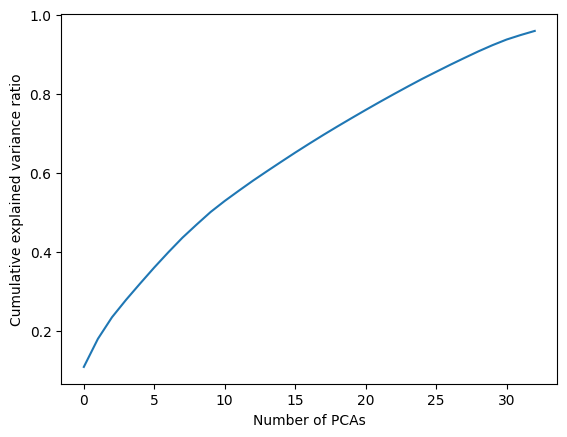

In [24]:
import matplotlib.pyplot as plt
var_ratios = pca.explained_variance_ratio_

# Plot cumulative sum of explained variance ratio
plt.plot(np.cumsum(var_ratios))
plt.xlabel('Number of PCAs')
plt.ylabel('Cumulative explained variance ratio')
plt.show()